In [112]:
import pandas as pd
import numpy as np

dt = pd.read_csv('US_Accidents_Dec20.csv')

In [114]:
dt = dt[dt.State=='CA'] #initial filtering

In [115]:
dt.columns

Index(['ID', 'Source', 'TMC', 'Severity', 'Start_Time', 'End_Time',
       'Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)',
       'Description', 'Number', 'Street', 'Side', 'City', 'County', 'State',
       'Zipcode', 'Country', 'Timezone', 'Airport_Code', 'Weather_Timestamp',
       'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)',
       'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)',
       'Precipitation(in)', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing',
       'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station',
       'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop',
       'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [116]:
dt[:1].T

,728
ID,A-729
Source,MapQuest
TMC,201.0
Severity,3
Start_Time,2016-06-21 10:34:40
End_Time,2016-06-21 11:04:40
Start_Lat,38.0853
Start_Lng,-122.233017
End_Lat,NaN
End_Lng,NaN


In [117]:
dx = dt[(dt.Start_Lat>=37.708) & (dt.Start_Lat<=37.808) & (dt.Start_Lng>-122.55)& (dt.Start_Lng<-122.35)]

9275


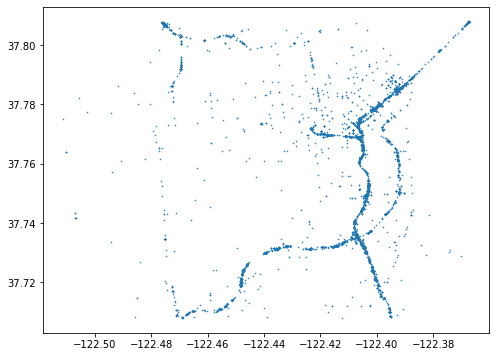

In [118]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter(dx.Start_Lng,dx.Start_Lat,s=0.3)
print(len(dx))

In [119]:
dx['Start_Time'] = pd.to_datetime(dx.Start_Time)
dx['End_Time'] = pd.to_datetime(dx.End_Time)
# dx['Hour'] = list(map(lambda v:str(v).split('T')[1].split(':')[0],dx.Start_Time.values))

secs = (dx.End_Time-dx.Start_Time).values/(np.power(10,9))
secs /=60
dx['Duration'] = secs.astype(int)

C:\Users\A\AppData\Local\Temp\ipykernel_3756\3004341398.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dx['Start_Time'] = pd.to_datetime(dx.Start_Time)
C:\Users\A\AppData\Local\Temp\ipykernel_3756\3004341398.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dx['End_Time'] = pd.to_datetime(dx.End_Time)
C:\Users\A\AppData\Local\Temp\ipykernel_3756\3004341398.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value 

In [120]:
dx

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,...,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Duration
735,A-736,MapQuest,201.0,3,2016-06-21 10:51:31,2016-06-21 11:21:31,37.719162,-122.448273,NaN,NaN,...,False,False,False,False,False,Day,Day,Day,Day,30
765,A-766,MapQuest,201.0,3,2016-06-21 12:46:38,2016-06-21 13:16:38,37.732746,-122.404938,NaN,NaN,...,False,False,False,False,False,Day,Day,Day,Day,30
766,A-767,MapQuest,201.0,2,2016-06-21 12:58:04,2016-06-21 13:28:04,37.749485,-122.403236,NaN,NaN,...,False,False,False,False,False,Day,Day,Day,Day,30
788,A-789,MapQuest,201.0,3,2016-06-21 14:57:48,2016-06-21 15:27:48,37.731983,-122.415413,NaN,NaN,...,False,False,False,False,False,Day,Day,Day,Day,30
808,A-809,MapQuest,201.0,2,2016-06-21 20:03:18,2016-06-21 20:33:18,37.807072,-122.475616,NaN,NaN,...,False,False,False,False,False,Day,Day,Day,Day,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4232043,A-4238909,Bing,NaN,2,2019-08-22 08:16:16,2019-08-22 08:45:08,37.727917,-122.402949,37.723623,-122.401341,...,False,False,False,False,False,Day,Day,Day,Day,28
4232048,A-4238914,Bing,NaN,2,2019-08-22 10:32:31,2019-08-22 11:01:29,37.775791,-122.405039,37.778480,-122.400610,...,False,False,False,False,False,Day,Day,Day,Day,28
4232056,A-4238922,Bing,NaN,2,2019-08-22 14:34:29,2019-08-22 15:03:33,37.752512,-122.402790,37.761970,-122.405780,...,False,False,False,False,False,Day,Day,Day,Day,29
4232058,A-4238924,Bing,NaN,2,2019-08-22 15:04:32,2019-08-22 15:33:31,37.778480,-122.400610,37.782310,-122.396080,...,False,False,False,False,False,Day,Day,Day,Day,28


In [121]:
dx.to_csv('SF_stage1.csv',index=False) #stage1 filtering/processing - hour and duration of the traffic accident added

In [122]:
#dropping fields with zero variance, also dropping fields with coordinates to make model location invariant (incident duration will be predicted purely from the incident characteristics)
dm = dx.drop(['End_Lat','End_Lng','Start_Lat','Start_Lng','Street','City','Country','Timezone','Weather_Timestamp','Zipcode'],axis=1)

In [123]:
#calculating month index and starting hour of the incident
mnt=dm.Start_Time.map(lambda x: int(x.strftime('%m')) + (int(x.strftime('%y'))-16)*12)
mnt-=mnt.min()
dm['monthidx'] = mnt

dm['SHour'] = list(map(lambda v:str(v).split('T')[1].split(':')[0],dm.Start_Time.values))
import numpy as np
secs = (dm.End_Time-dm.Start_Time).values/(np.power(10,9))
secs /=60
dm['Duration'] = secs.astype(int)
dm=dm.drop(['Start_Time','End_Time'],axis=1)

In [124]:
print(np.round(dm['TMC'].isna().sum()/len(dm),2)) #42% of the field is NaN values, to be dropped
print(np.round(dm['Wind_Chill(F)'].isna().sum()/len(dm),2)) #54% of the field is NaN values, to be dropped
print(np.round(dm['Precipitation(in)'].isna().sum()/len(dm),2)) #50% of the field is NaN values, to be dropped

0.43
0.54
0.5


In [125]:
#zero variance fields
print(dm['Roundabout'].unique())
print(dm['Bump'].unique())
print(dm['State'].unique())

[False]
[False]
['CA']


In [126]:
dm = dm.drop(['State','Bump','Roundabout'],axis=1)
dm = dm.drop(['Number'],axis=1)
dm = dm.drop(['Wind_Chill(F)','Precipitation(in)'],axis=1)
dm = dm.drop(['TMC'],axis=1)

dm['Wind_Direction']=dm['Wind_Direction'].apply(lambda v: str(v))
dm['Weather_Condition']=dm['Weather_Condition'].apply(lambda v: str(v))

dm=dm.dropna() #drop rows with NaN values

In [127]:
dm.to_csv("SF_raw.csv",index=False)

In [128]:
dm

,ID,Source,Severity,Distance(mi),Description,Side,County,Airport_Code,Temperature(F),Humidity(%),...,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Duration,monthidx,SHour
735,A-736,MapQuest,3,0.000,Accident on I-280 Northbound at Geneva Ave.,R,San Francisco,KSFO,71.1,55.0,...,False,False,False,Day,Day,Day,Day,30,3,10
765,A-766,MapQuest,3,0.000,#1 lane blocked due to accident on US-101 Sout...,R,San Francisco,KSFO,73.0,44.0,...,False,False,False,Day,Day,Day,Day,30,3,12
766,A-767,MapQuest,2,0.000,Slow lane blocked due to accident on US-101 So...,R,San Francisco,KOAK,77.0,40.0,...,False,False,False,Day,Day,Day,Day,30,3,12
788,A-789,MapQuest,3,0.000,Accident on I-280 Northbound at Exit 53 Aleman...,R,San Francisco,KSFO,71.1,47.0,...,False,False,False,Day,Day,Day,Day,30,3,14
808,A-809,MapQuest,2,0.000,Accident on US-101 Golden Gate Brg Southbound ...,R,San Francisco,KSFO,61.0,67.0,...,False,False,False,Day,Day,Day,Day,30,3,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4232043,A-4238909,Bing,2,0.309,At Paul Ave - Accident.,R,San Francisco,KSFO,64.0,87.0,...,False,False,False,Day,Day,Day,Day,28,41,08
4232048,A-4238914,Bing,2,0.305,At 4th St/5th St - Accident.,R,San Francisco,KSFO,71.0,73.0,...,False,False,False,Day,Day,Day,Day,28,41,10
4232056,A-4238922,Bing,2,0.674,At Vermont St - Accident.,R,San Francisco,KOAK,78.0,56.0,...,False,False,False,Day,Day,Day,Day,29,41,14
4232058,A-4238924,Bing,2,0.362,At 4th St/5th St - Accident. Lane blocked.,R,San Francisco,KOAK,78.0,56.0,...,False,False,False,Day,Day,Day,Day,28,41,15


In [129]:
# Digitizing fields
for C in dm.columns:
    if (C!='Description') and (C!='ID') and (C!='Duration'):
        from sklearn import preprocessing
        if len(dm[C].unique())<28:
            print(C,'\t\t',len(dm[C].unique()),'\t',np.round(sum(dm[C].isna())/len(dm[C]),3))

            le = preprocessing.LabelEncoder()
            dm[C] = le.fit_transform(dm[C].values)

Source 		 3 	 0.0
Severity 		 4 	 0.0
Side 		 2 	 0.0
County 		 2 	 0.0
Airport_Code 		 2 	 0.0
Visibility(mi) 		 19 	 0.0
Wind_Direction 		 23 	 0.0
Weather_Condition 		 26 	 0.0
Amenity 		 2 	 0.0
Crossing 		 2 	 0.0
Give_Way 		 2 	 0.0
Junction 		 2 	 0.0
No_Exit 		 2 	 0.0
Railway 		 2 	 0.0
Station 		 2 	 0.0
Stop 		 2 	 0.0
Traffic_Calming 		 2 	 0.0
Traffic_Signal 		 2 	 0.0
Turning_Loop 		 1 	 0.0
Sunrise_Sunset 		 2 	 0.0
Civil_Twilight 		 2 	 0.0
Nautical_Twilight 		 2 	 0.0
Astronomical_Twilight 		 2 	 0.0
SHour 		 24 	 0.0


In [131]:
Y = dm['Duration']
dm = dm.drop(['Duration'],axis=1)
dm['Duration'] = Y

dm['Distance(mi)'] = np.round(dm['Distance(mi)'],3)

dm.drop(['ID','Description'],axis=1).to_csv('SF2.csv',index=False)